In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [ ]:
import tensorflow as tf
print(tf.__version__)


2.17.0


In [ ]:
import tensorflow as tf

# Check for GPU availability
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print("TensorFlow version: ", tf.__version__)

# Check the specific GPU being used
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print(f'Found GPU at: {device_name}')


Num GPUs Available:  1
TensorFlow version:  2.17.0
Found GPU at: /device:GPU:0


In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.17.0
Num GPUs Available: 1


In [ ]:
# Clean installation path
%pip install --upgrade typeguard
%pip install tensorflow_addons matplotlib inflect

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 31.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.4.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [ ]:
!pip install pydicom Pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 65.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Set path to your dataset in Google Drive
dicom_root = '/content/drive/My Drive/pix2pix_dataset'

pet_dicom_dir = os.path.join(dicom_root, 'PET')
ct_dicom_dir = os.path.join(dicom_root, 'CT')


In [ ]:
import os # Import the os module

# Set path to your dataset in Google Drive
dicom_root = '/content/drive/My Drive/pix2pix_dataset'

pet_dicom_dir = os.path.join(dicom_root, 'PET') # Now os.path.join is accessible
ct_dicom_dir = os.path.join(dicom_root, 'CT')

In [ ]:
!pip install pydicom Pillow


In [ ]:
import os
import pydicom
from PIL import Image
import numpy as np

# Path to your dataset in Google Drive
dicom_root = '/content/drive/My Drive/pix2pix_dataset'

# PET and CT directories inside the dataset
pet_dicom_dir = os.path.join(dicom_root, 'PET')
ct_dicom_dir = os.path.join(dicom_root, 'CT')

# Output directories for converted PNG images
output_pet_dir = '/content/drive/My Drive/pix2pix_dataset/train/PET'
output_ct_dir = '/content/drive/My Drive/pix2pix_dataset/train/CT'

# Create output directories if they don't exist
os.makedirs(output_pet_dir, exist_ok=True)
os.makedirs(output_ct_dir, exist_ok=True)

# Function to convert DICOM to PNG
def convert_dicom_to_png(dicom_path, output_path):
    # Read the DICOM file
    dicom = pydicom.dcmread(dicom_path)

    # Convert the pixel data to a normalized array (0-255)
    image_array = dicom.pixel_array
    image_array = image_array.astype(float)

    # Normalize pixel values between 0-255
    rescaled_image = (np.maximum(image_array, 0) / image_array.max()) * 255
    rescaled_image = np.uint8(rescaled_image)

    # Convert to a PIL image and save as PNG
    image = Image.fromarray(rescaled_image)
    image.save(output_path)

# Get sorted list of DICOM files in both PET and CT directories
pet_files = sorted([f for f in os.listdir(pet_dicom_dir) if f.endswith('.dcm')])
ct_files = sorted([f for f in os.listdir(ct_dicom_dir) if f.endswith('.dcm')])

# Ensure PET and CT directories have the same number of files
assert len(pet_files) == len(ct_files), "PET and CT folder files do not match in number!"

# Convert and save each PET and CT image pair
for pet_file, ct_file in zip(pet_files, ct_files):
    # Full paths to the DICOM files
    pet_dicom_path = os.path.join(pet_dicom_dir, pet_file)
    ct_dicom_path = os.path.join(ct_dicom_dir, ct_file)

    # Output paths for the PNG files
    pet_output_path = os.path.join(output_pet_dir, pet_file.replace('.dcm', '.png'))
    ct_output_path = os.path.join(output_ct_dir, ct_file.replace('.dcm', '.png'))

    # Convert PET and CT images
    convert_dicom_to_png(pet_dicom_path, pet_output_path)
    convert_dicom_to_png(ct_dicom_path, ct_output_path)

print("DICOM to PNG conversion complete!")


DICOM to PNG conversion complete!


In [ ]:
import os
from PIL import Image

# Define directories for training and validation
train_pet_dir = '/content/drive/My Drive/pix2pix_dataset/train/PET'
train_ct_dir = '/content/drive/My Drive/pix2pix_dataset/train/CT'

# Set desired image size
image_size = (256, 256)

# Function to resize images
def resize_images(input_dir, output_dir, size):
    os.makedirs(output_dir, exist_ok=True)
    for image_name in os.listdir(input_dir):
        image_path = os.path.join(input_dir, image_name)
        image = Image.open(image_path)
        image = image.resize(size)
        image.save(os.path.join(output_dir, image_name))

# Resize PET and CT images in training set
resize_images(train_pet_dir, train_pet_dir, image_size)
resize_images(train_ct_dir, train_ct_dir, image_size)

print("Resizing complete!")


Resizing complete!


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output


In [ ]:
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

    if apply_batchnorm:
        result.add(layers.BatchNormalization())

    result.add(layers.LeakyReLU())

    return result

def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(layers.Conv2DTranspose(filters, size, strides=2,
                                      padding='same',
                                      kernel_initializer=initializer,
                                      use_bias=False))
    result.add(layers.BatchNormalization())

    if apply_dropout:
        result.add(layers.Dropout(0.5))

    result.add(layers.ReLU())

    return result

def Generator():
    inputs = layers.Input(shape=[256, 256, 3])

    # Encoder: Downsampling through the model
    down_stack = [
        downsample(64, 4, apply_batchnorm=False),  # (bs, 128, 128, 64)
        downsample(128, 4),  # (bs, 64, 64, 128)
        downsample(256, 4),  # (bs, 32, 32, 256)
        downsample(512, 4),  # (bs, 16, 16, 512)
        downsample(512, 4),  # (bs, 8, 8, 512)
        downsample(512, 4),  # (bs, 4, 4, 512)
        downsample(512, 4),  # (bs, 2, 2, 512)
        downsample(512, 4),  # (bs, 1, 1, 512)
    ]

    # Decoder: Upsampling and establishing the skip connections
    up_stack = [
        upsample(512, 4, apply_dropout=True),  # (bs, 2, 2, 1024)
        upsample(512, 4, apply_dropout=True),  # (bs, 4, 4, 1024)
        upsample(512, 4, apply_dropout=True),  # (bs, 8, 8, 1024)
        upsample(512, 4),  # (bs, 16, 16, 1024)
        upsample(256, 4),  # (bs, 32, 32, 512)
        upsample(128, 4),  # (bs, 64, 64, 256)
        upsample(64, 4),   # (bs, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = layers.Conv2DTranspose(3, 4,
                                  strides=2,
                                  padding='same',
                                  kernel_initializer=initializer,
                                  activation='tanh')  # (bs, 256, 256, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)


In [ ]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = layers.Input(shape=[256, 256, 3], name='input_image')
    tar = layers.Input(shape=[256, 256, 3], name='target_image')

    x = layers.Concatenate()([inp, tar])  # (bs, 256, 256, channels*2)

    down1 = downsample(64, 4, False)(x)    # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1)      # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2)      # (bs, 32, 32, 256)

    zero_pad1 = layers.ZeroPadding2D()(down3)  # (bs, 34, 34, 256)
    conv = layers.Conv2D(512, 4, strides=1,
                         kernel_initializer=initializer,
                         use_bias=False)(zero_pad1)  # (bs, 31, 31, 512)

    batchnorm1 = layers.BatchNormalization()(conv)
    leaky_relu = layers.LeakyReLU()(batchnorm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu)  # (bs, 33, 33, 512)

    last = layers.Conv2D(1, 4, strides=1,
                         kernel_initializer=initializer)(zero_pad2)  # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)


In [ ]:
# Binary cross-entropy loss
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Discriminator loss
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

# Generator loss
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
    # L1 loss for content preservation
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    # Total generator loss
    total_gen_loss = gan_loss + (100 * l1_loss)
    return total_gen_loss


In [ ]:
generator = Generator()
discriminator = Discriminator()

generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [ ]:
# Define paths to the training and validation datasets
train_pet_dir = '/content/drive/My Drive/pix2pix_dataset/train/PET'
train_ct_dir = '/content/drive/My Drive/pix2pix_dataset/train/CT'

val_pet_dir = '/content/drive/My Drive/pix2pix_dataset/val/PET'
val_ct_dir = '/content/drive/My Drive/pix2pix_dataset/val/CT'


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
BUFFER_SIZE = 400
BATCH_SIZE = 1  # pix2pix typically uses a batch size of 1

def load_image(pet_path, ct_path):
    pet_image = tf.io.read_file(pet_path)
    pet_image = tf.image.decode_png(pet_image, channels=3)
    pet_image = tf.image.resize(pet_image, [256, 256])
    pet_image = (pet_image / 127.5) - 1  # Normalize to [-1, 1]

    ct_image = tf.io.read_file(ct_path)
    ct_image = tf.image.decode_png(ct_image, channels=3)
    ct_image = tf.image.resize(ct_image, [256, 256])
    ct_image = (ct_image / 127.5) - 1  # Normalize to [-1, 1]

    return pet_image, ct_image

def get_dataset(pet_dir, ct_dir):
    pet_images = sorted([os.path.join(pet_dir, img) for img in os.listdir(pet_dir) if img.endswith('.png')])
    ct_images = sorted([os.path.join(ct_dir, img) for img in os.listdir(ct_dir) if img.endswith('.png')])

    dataset = tf.data.Dataset.from_tensor_slices((pet_images, ct_images))
    dataset = dataset.map(load_image, num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    return dataset

# Create the training and validation datasets
train_dataset = get_dataset(train_pet_dir, train_ct_dir)
val_dataset = get_dataset(val_pet_dir, val_ct_dir)


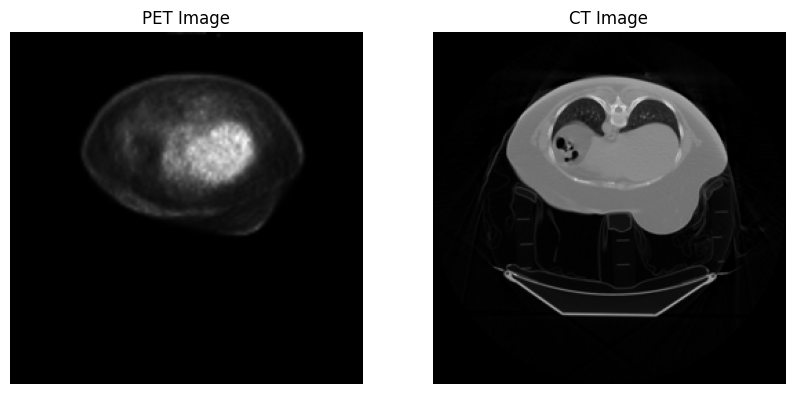

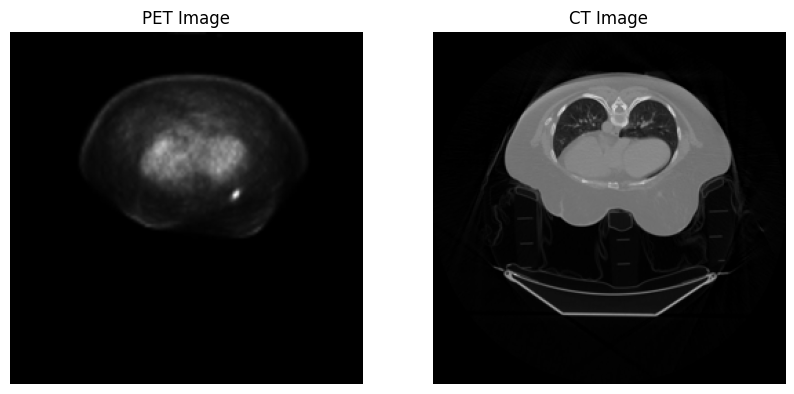

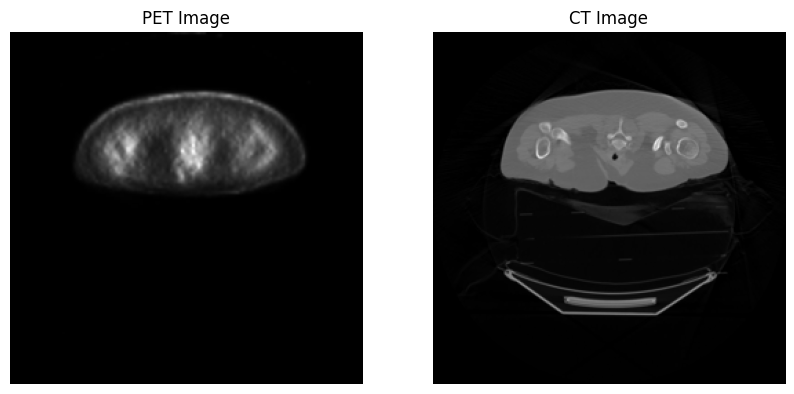

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def display_sample(pet, ct):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("PET Image")
    plt.imshow((pet * 0.5) + 0.5)  # Rescale to [0,1]
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("CT Image")
    plt.imshow((ct * 0.5) + 0.5)  # Rescale to [0,1]
    plt.axis('off')

    plt.show()

# Display a few samples from the training dataset
for pet, ct in train_dataset.take(3):
    display_sample(pet[0], ct[0])


In [ ]:
checkpoint_dir = '/content/drive/My Drive/pix2pix_dataset/checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


In [ ]:
@tf.function
def train_step(input_image, target, epoch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_loss,
                                            generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss,
                                                 discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients,
                                            generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                                discriminator.trainable_variables))

    return gen_loss, disc_loss


In [ ]:
EPOCHS = 150

def fit(train_ds, val_ds, epochs):
    for epoch in range(epochs):
        start = time.time()

        print(f'Epoch {epoch+1}/{epochs}')

        # Train
        for input_image, target in train_ds:
            gen_loss, disc_loss = train_step(input_image, target, epoch)

        # Save the model every 20 epochs
        if (epoch + 1) % 20 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)
            print(f'Checkpoint saved at epoch {epoch+1}')

        # Print the losses
        print(f'Epoch {epoch+1} completed in {time.time()-start:.2f} seconds')
        print(f'Generator Loss: {gen_loss.numpy():.4f}, Discriminator Loss: {disc_loss.numpy():.4f}')

    # Save the final model
    checkpoint.save(file_prefix=checkpoint_prefix)
    print('Training complete and final checkpoint saved.')


In [ ]:
fit(train_dataset, val_dataset, EPOCHS)


Epoch 1/150
Epoch 1 completed in 82.00 seconds
Generator Loss: 9.3728, Discriminator Loss: 0.8987
Epoch 2/150
Epoch 2 completed in 14.47 seconds
Generator Loss: 7.9617, Discriminator Loss: 0.5209
Epoch 3/150
Epoch 3 completed in 14.84 seconds
Generator Loss: 5.3304, Discriminator Loss: 1.5397
Epoch 4/150
Epoch 4 completed in 14.60 seconds
Generator Loss: 5.8721, Discriminator Loss: 1.2519
Epoch 5/150
Epoch 5 completed in 14.69 seconds
Generator Loss: 4.9189, Discriminator Loss: 1.0206
Epoch 6/150
Epoch 6 completed in 14.71 seconds
Generator Loss: 3.6144, Discriminator Loss: 1.4303
Epoch 7/150
Epoch 7 completed in 14.62 seconds
Generator Loss: 3.3328, Discriminator Loss: 1.4034
Epoch 8/150
Epoch 8 completed in 14.87 seconds
Generator Loss: 5.7437, Discriminator Loss: 1.0472
Epoch 9/150
Epoch 9 completed in 14.70 seconds
Generator Loss: 3.2376, Discriminator Loss: 1.2246
Epoch 10/150
Epoch 10 completed in 14.49 seconds
Generator Loss: 3.3677, Discriminator Loss: 1.2060
Epoch 11/150
Epoch

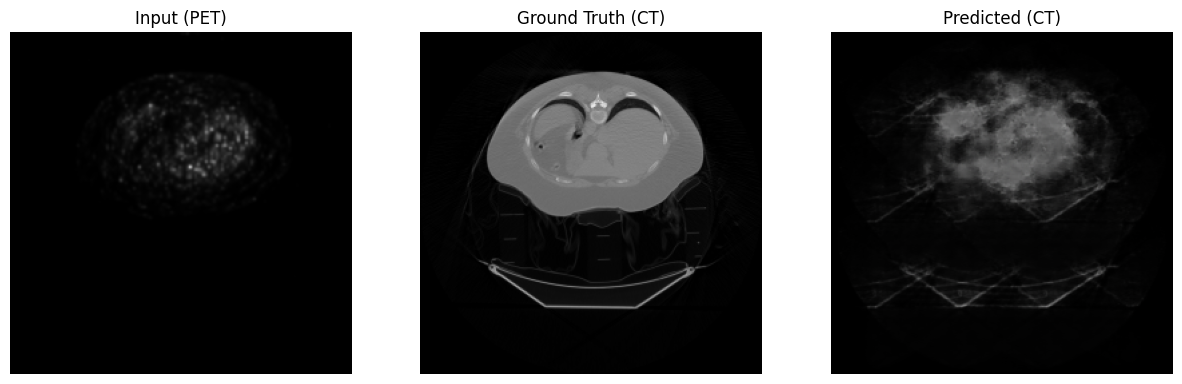

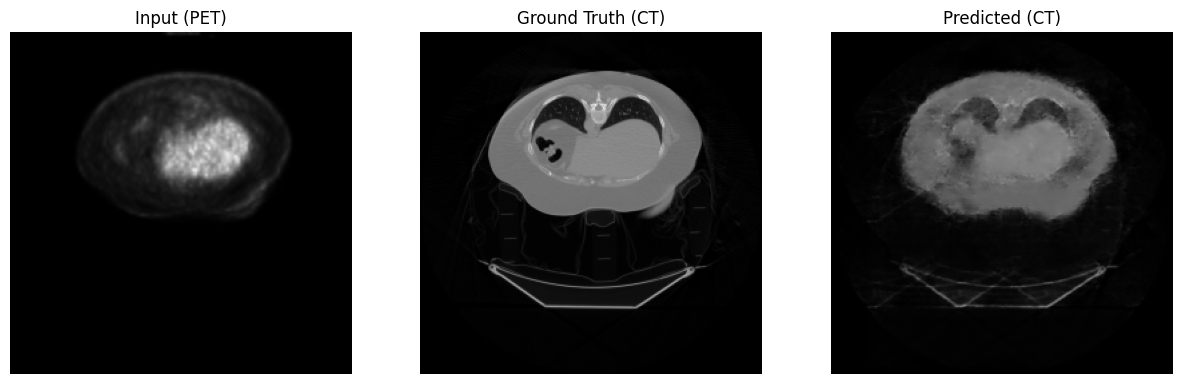

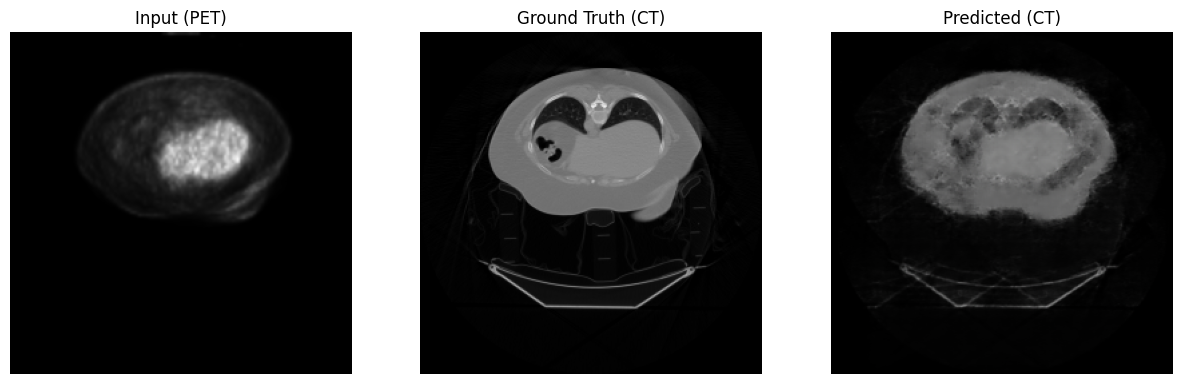

In [ ]:
def generate_and_display(model, test_input, target):
    prediction = model(test_input, training=False)
    plt.figure(figsize=(15, 15))

    display_list = [test_input[0], target[0], prediction[0]]
    title = ['Input (PET)', 'Ground Truth (CT)', 'Predicted (CT)']

    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow((display_list[i] * 0.5) + 0.5, cmap='gray')
        plt.axis('off')
    plt.show()

# Visualize results on the validation dataset
for example_input, example_target in val_dataset.take(3):
    generate_and_display(generator, example_input, example_target)


In [ ]:
generator.save('/content/drive/My Drive/pix2pix_generator_model')


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/My Drive/pix2pix_generator_model.

In [ ]:
generator.save('/content/drive/My Drive/pix2pix_generator_model.keras')
# Added the .keras extension to the file path